<a href="https://colab.research.google.com/github/teefirdaustf/mental-health_remote-work/blob/byzid-modelling/Copy_of_Data_Preprocessing_DA_GA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
import pandas as pd
import gdown

# URLs of the files
train_url = "https://drive.google.com/uc?id=1h3dLm_YZnlOkYeYhAJYW4v1EMWsbxbRR"
test_url = "https://drive.google.com/uc?id=1s0KGLEcswxCmUxW86r8fqGzZcAamDDCa"

# Download the files using gdown
gdown.download(train_url, "train.csv", quiet=False)
gdown.download(test_url, "test_data.csv", quiet=False)

# Read the downloaded CSV files into pandas DataFrames
train_df = pd.read_csv("train.csv")  # Load data from train.csv
test_df = pd.read_csv("test_data.csv") # Load data from test_data.csv


#check imported dataset
print(train_df.shape)
print(test_df.shape)

#train_df.head(2).T
#test_df.head(2).T

Downloading...
From: https://drive.google.com/uc?id=1h3dLm_YZnlOkYeYhAJYW4v1EMWsbxbRR
To: /content/train.csv
100%|██████████| 1.56M/1.56M [00:00<00:00, 121MB/s]
Downloading...
From: https://drive.google.com/uc?id=1s0KGLEcswxCmUxW86r8fqGzZcAamDDCa
To: /content/test_data.csv
100%|██████████| 788k/788k [00:00<00:00, 110MB/s]

(22750, 9)
(12250, 8)


In [ ]:
#setting the Employee ID for both csv files as the index for easier querying

train_df.set_index('Employee ID', inplace=True)
test_df.set_index('Employee ID', inplace=True)


In [ ]:
train_df

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...
fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72


Check Datatype

In [ ]:
#check datatypes of each column in the dataset for train.csv

train_df.dtypes

,0
Date of Joining,object
Gender,object
Company Type,object
WFH Setup Available,object
Designation,float64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [ ]:
#converting data type appropriately

train_df['Date of Joining'] = pd.to_datetime(train_df['Date of Joining'])
test_df['Date of Joining'] = pd.to_datetime(test_df['Date of Joining'])

In [ ]:
#to get the sum of unique values in each column

train_df.nunique()

,0
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [ ]:
train_df.shape

(22750, 8)

In [ ]:
df1 = train_df.copy()
df2 = test_df.copy()

Cleaned Data process

In [ ]:
df1.isna().sum()

,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [ ]:
#df1['Mental Fatigue Score'].unique()
#df1['Burn Rate'].unique()
df1['Resource Allocation'].unique()

array([ 3.,  2., nan,  1.,  7.,  4.,  6.,  5.,  8., 10.,  9.])

Handling Missing Value

In [ ]:
#to get the percentage of missing values for each column, less than 10% max

(df1.isnull().mean() * 100).sort_values(ascending=False)

,0
Mental Fatigue Score,9.305495
Resource Allocation,6.070330
Burn Rate,4.940659
Date of Joining,0.000000
Gender,0.000000
Company Type,0.000000
WFH Setup Available,0.000000
Designation,0.000000


In [ ]:
#dropping all rows with null values

df1 = df1.dropna()

In [ ]:
df1.isna()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000360033003200,False,False,False,False,False,False,False,False
fffe3700360033003500,False,False,False,False,False,False,False,False
fffe32003400380032003900,False,False,False,False,False,False,False,False
fffe31003900340031003600,False,False,False,False,False,False,False,False
fffe3300350037003500,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
fffe3300390030003600,False,False,False,False,False,False,False,False
fffe32003500370033003200,False,False,False,False,False,False,False,False
fffe33003000350031003800,False,False,False,False,False,False,False,False


Remove duplicate

In [ ]:
#check for duplicates

df1.duplicated().sum()

6

In [ ]:
df1[df1.duplicated()]

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000310032003900,2008-07-18,Female,Service,No,3.0,6.0,7.7,0.58
fffe31003200380034003600,2008-04-17,Male,Product,No,4.0,7.0,6.7,0.56
fffe3400360035003400,2008-08-14,Female,Service,Yes,0.0,1.0,0.0,0.00
fffe31003000330035003100,2008-06-04,Female,Service,No,1.0,3.0,4.4,0.29
fffe340038003500,2008-02-22,Female,Service,Yes,1.0,2.0,4.0,0.24
fffe32003900310036003100,2008-06-28,Male,Service,No,3.0,6.0,8.6,0.68


In [ ]:
#dropping all duplicated rows

df1 = df1.drop_duplicates()

In [ ]:
df1.duplicated().sum()

0

# Exploration

Text(0, 0.5, 'Count')

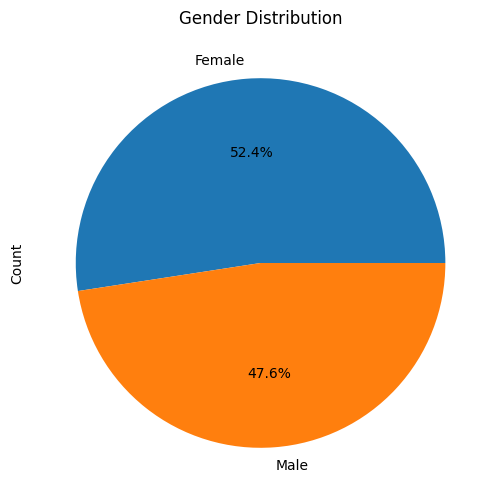

In [ ]:
#dataset gender distribution

df1_gender = df1['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
df1_gender.set_title('Gender Distribution')
df1_gender.set_ylabel('Count')

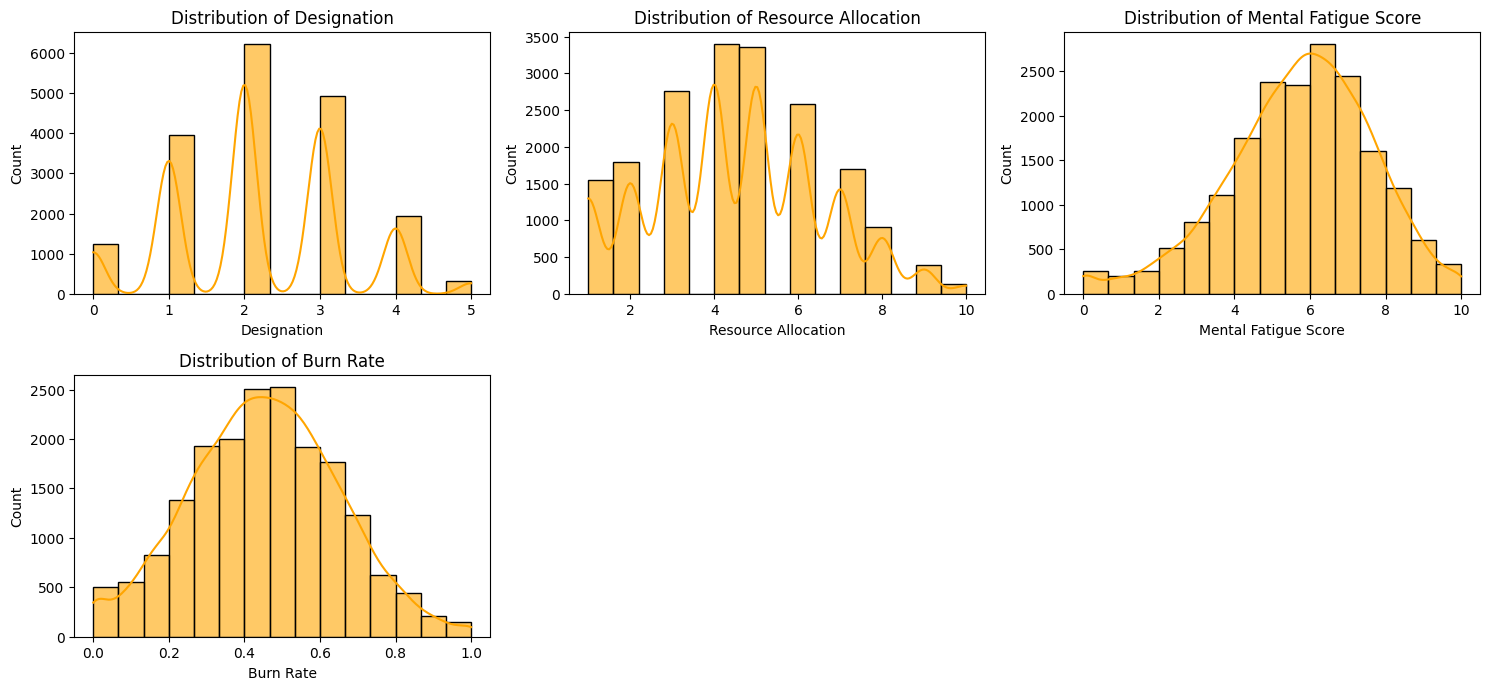

In [ ]:
# Specify the columns to plot
columns_to_plot = [
    'Designation',
    'Resource Allocation',
    'Mental Fatigue Score',
    'Burn Rate'
]

# Create the subplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df1[column], bins=15, kde=True, color='orange', edgecolor='black', alpha=0.6)
    plt.title(f"Distribution of {column.replace('_', ' ')}")
    plt.xlabel(column.replace('_', ' '))
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

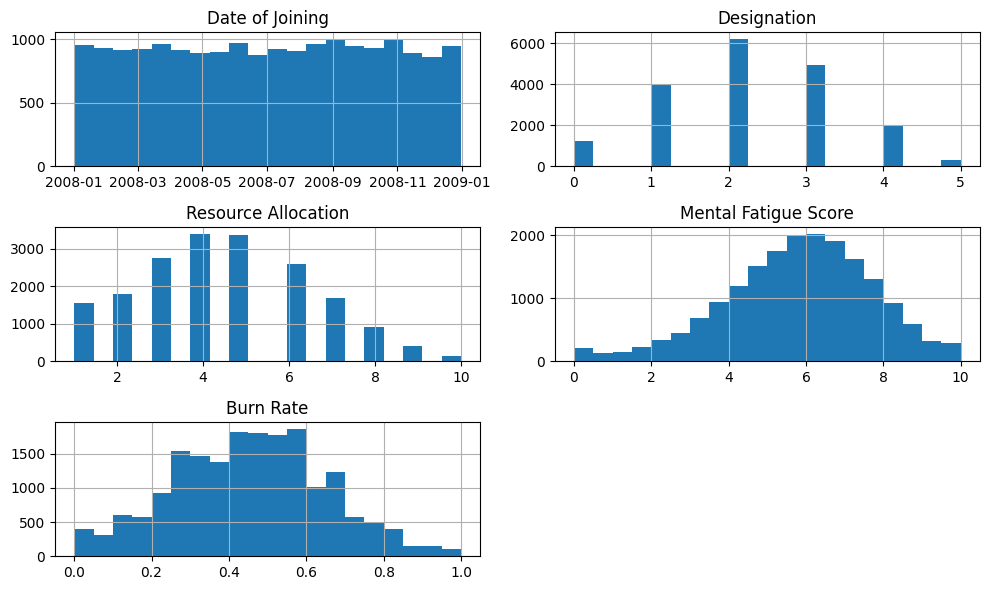

In [ ]:
#Visualize numeric features:

df1.hist(figsize=(10, 6),bins=20)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Workload vs Mental Fatigue Score')

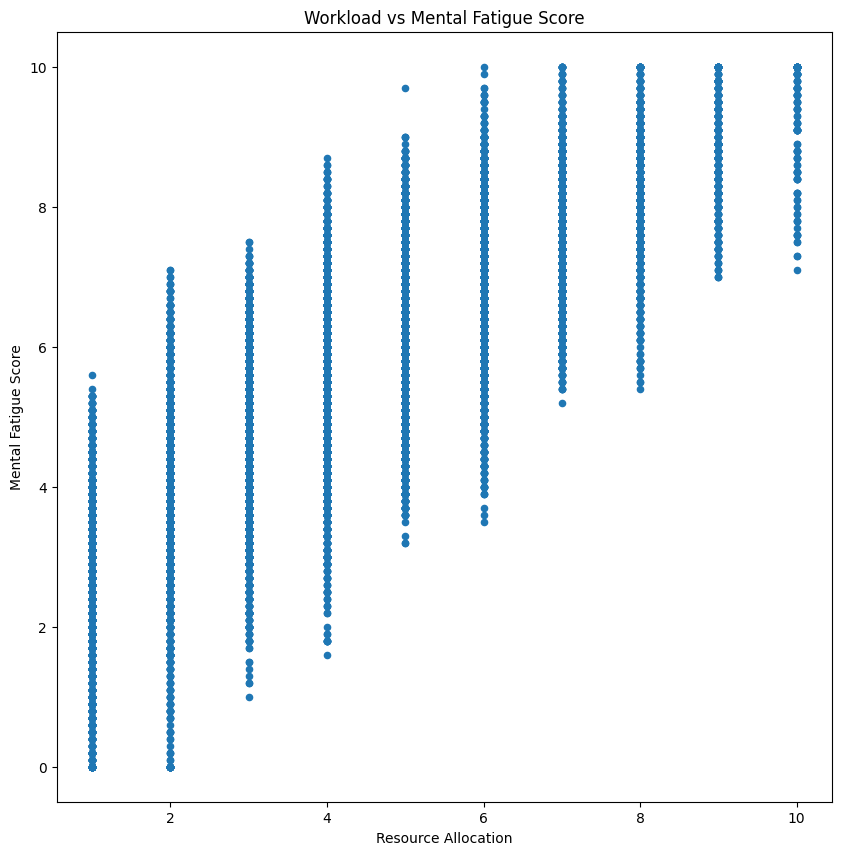

In [ ]:
#checking the relationship between employee's given workload and mental fatigueness

df1_workload_vs_fatigue = df1.plot.scatter(x='Resource Allocation', y='Mental Fatigue Score', figsize=(10,10))
df1_workload_vs_fatigue.set_title('Workload vs Mental Fatigue Score')

In [ ]:
df1.head(2).T

Employee ID,fffe32003000360033003200,fffe3700360033003500
Date of Joining,2008-09-30 00:00:00,2008-11-30 00:00:00
Gender,Female,Male
Company Type,Service,Service
WFH Setup Available,No,Yes
Designation,2.0,1.0
Resource Allocation,3.0,2.0
Mental Fatigue Score,3.8,5.0
Burn Rate,0.16,0.36


Text(0, 0.5, 'Frequency')

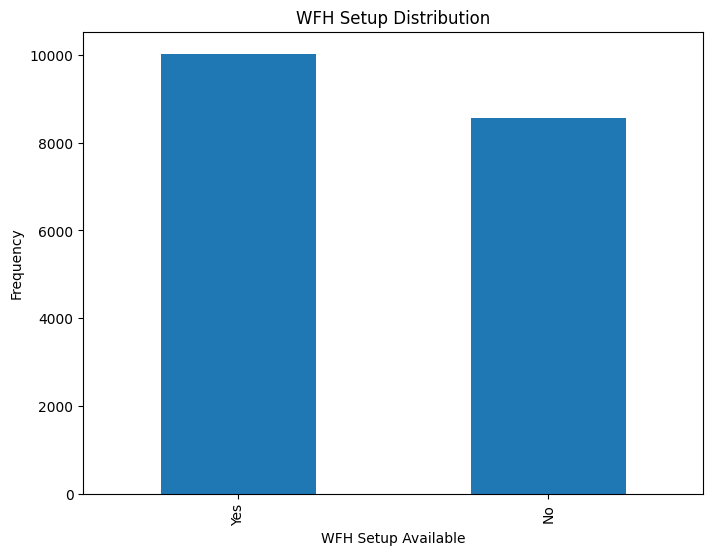

In [ ]:
#check how many have proper WFH setup

#df1['WFH Setup Available'].value_counts()
df1_wfh_setup_distb = df1['WFH Setup Available'].value_counts().plot(kind='bar', figsize=(8,6))
df1_wfh_setup_distb.set_title('WFH Setup Distribution')
df1_wfh_setup_distb.set_xlabel('WFH Setup Available')
df1_wfh_setup_distb.set_ylabel('Frequency')

In [ ]:
#group employee levels

bins = [0, 1.5, 3.5, 5.0]  # Bin edges for low, mid, and high
labels = ['Low', 'Mid', 'High']  # Labels for the bins

df1['Designation Level'] = pd.cut(df1['Designation'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
df1.head(2).T

Employee ID,fffe32003000360033003200,fffe3700360033003500
Date of Joining,2008-09-30 00:00:00,2008-11-30 00:00:00
Gender,Female,Male
Company Type,Service,Service
WFH Setup Available,No,Yes
Designation,2.0,1.0
Resource Allocation,3.0,2.0
Mental Fatigue Score,3.8,5.0
Burn Rate,0.16,0.36
Designation Level,Mid,Low


In [ ]:
df1['Date of Joining'].describe()

,Date of Joining
count,18584
mean,2008-07-01 11:57:45.174343680
min,2008-01-01 00:00:00
25%,2008-04-01 00:00:00
50%,2008-07-03 00:00:00
75%,2008-09-30 00:00:00
max,2008-12-31 00:00:00


<ipython-input-111-eb356386718f>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wfh_designation_counts = df1.groupby(['WFH Setup Available', 'Designation Level']).size().unstack()


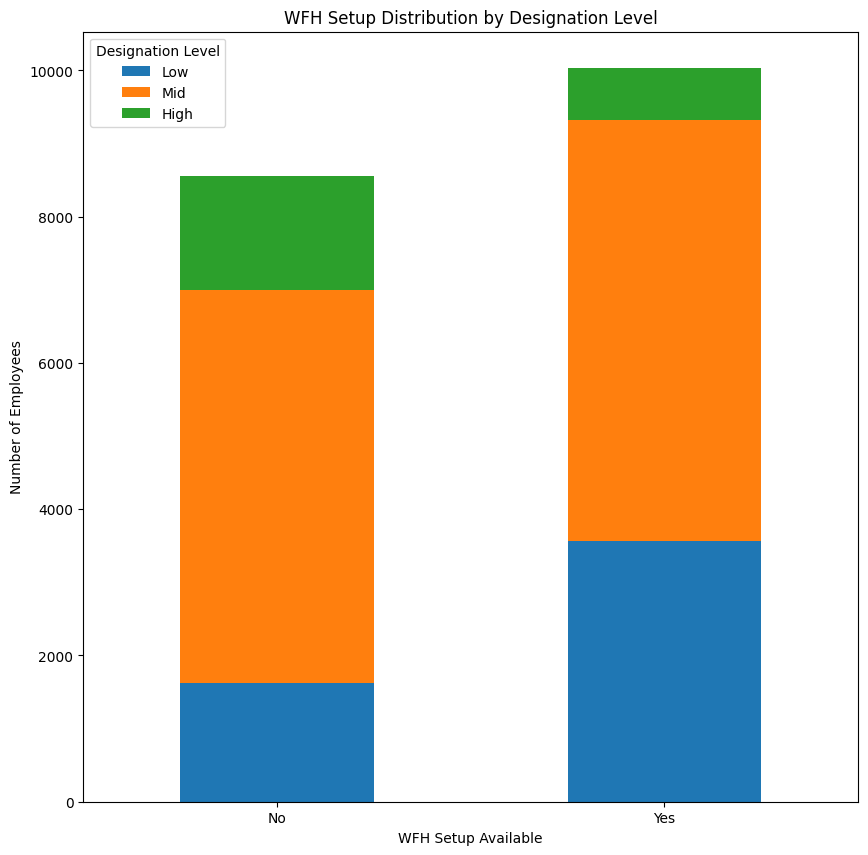

In [ ]:
#to have an overview of "Which staff designation level has/hasnt a wfh setup the most?"

wfh_designation_counts = df1.groupby(['WFH Setup Available', 'Designation Level']).size().unstack()

ax = wfh_designation_counts.plot(kind='bar', stacked=True, figsize=(10, 10))
ax.set_title('WFH Setup Distribution by Designation Level')
ax.set_xlabel('WFH Setup Available')
ax.set_ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(title='Designation Level')  # Add a legend for clarity
plt.show()

In [ ]:
df1_wfh_ctype = df1.groupby('Company Type')['WFH Setup Available'].value_counts()

df1_wfh_ctype

Company Type  WFH Setup Available
Product       Yes                    3465
              No                     2950
Service       Yes                    6563
              No                     5606
Name: count, dtype: int64

Text(0.5, 1.0, 'Company Type vs WFH Setup Availability')

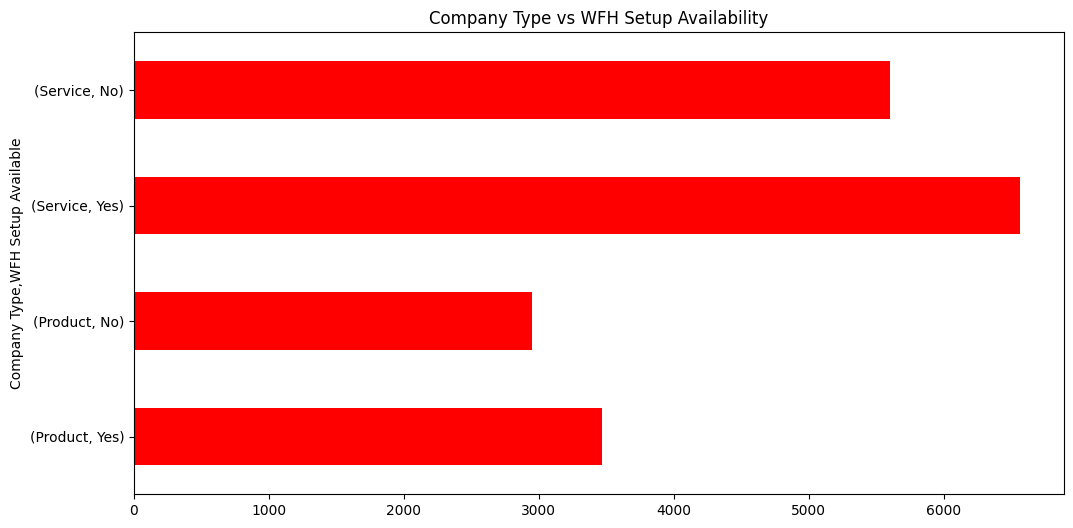

In [ ]:
df1_wfh_ctype.plot.barh(x='Company Type',y='WFH Setup Available',color='red', figsize=(12,6)).set_title('Company Type vs WFH Setup Availability')

Text(0.5, 1.0, 'Company Type vs Mental Fatigue Score')

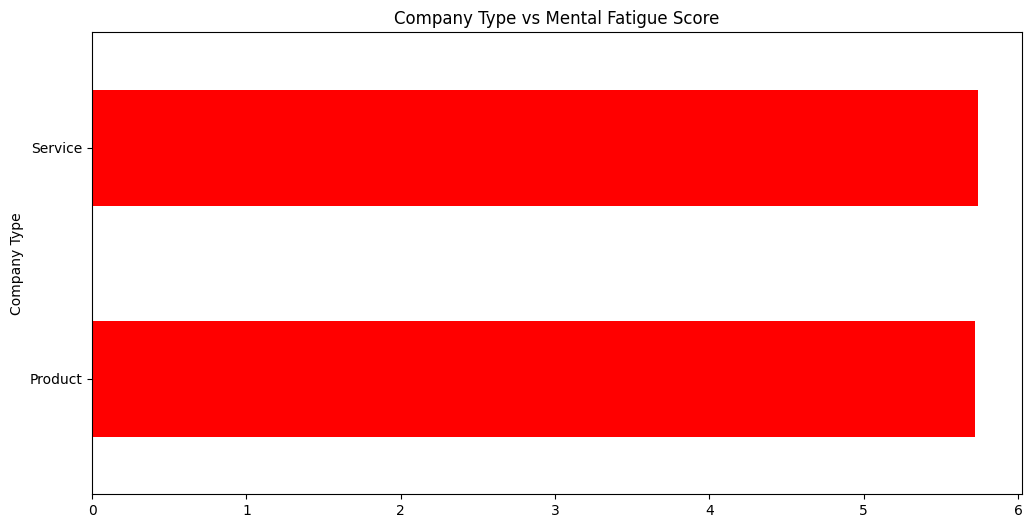

In [ ]:
df1_mfs_ctype = df1.groupby('Company Type')['Mental Fatigue Score'].mean()

#df1_mfs_ctype

df1_mfs_ctype.plot.barh(x='Company Type',y='Mental Fatigue Score',color='red', figsize=(12,6)).set_title('Company Type vs Mental Fatigue Score')

In [ ]:
#check how many records are there with "service" type company (to create a histogram)

Service_count = (df1['Company Type'] == 'Service').sum()
Product_count = (df1['Company Type'] == 'Product').sum()
print(f"Count of 'Service': {Service_count}")
print(f"Count of 'Product': {Product_count}")

print(f"Count of both:", Product_count + Service_count)



Count of 'Service': 12169
Count of 'Product': 6415
Count of both: 18584


In [ ]:
#to check designation level and mental fatigue

df1_designation_vs_fatigue = df1.groupby('Designation Level')['Mental Fatigue Score'].mean()

df1_designation_vs_fatigue

<ipython-input-115-170a074cdf28>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1_designation_vs_fatigue = df1.groupby('Designation Level')['Mental Fatigue Score'].mean()


,Mental Fatigue Score
Designation Level,
Low,4.013240
Mid,6.092337
High,7.903270


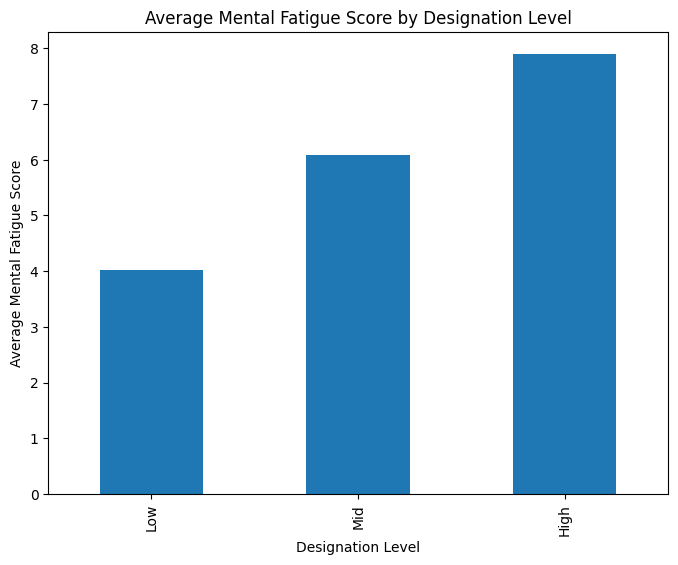

In [ ]:
ax = df1_designation_vs_fatigue.plot.bar(figsize=(8,6))
ax.set_title('Average Mental Fatigue Score by Designation Level')
ax.set_xlabel('Designation Level')
ax.set_ylabel('Average Mental Fatigue Score')
plt.show()

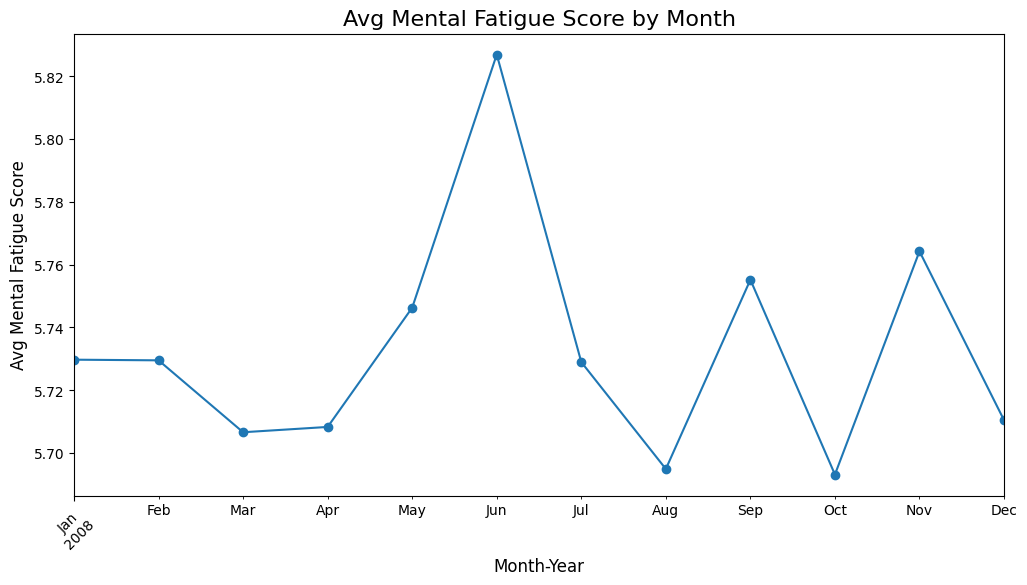

In [ ]:
# to get an overview of the avg mental fatigue score for each month based on joined date

df1['Month-Year'] = df1['Date of Joining'].dt.to_period('M')
monthly_mean_fatigue = df1.groupby('Month-Year')['Mental Fatigue Score'].mean()

ax = monthly_mean_fatigue.plot(kind='line', figsize=(12, 6), marker='o')

# Add labels and title
ax.set_title('Avg Mental Fatigue Score by Month', fontsize=16)
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Avg Mental Fatigue Score', fontsize=12)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


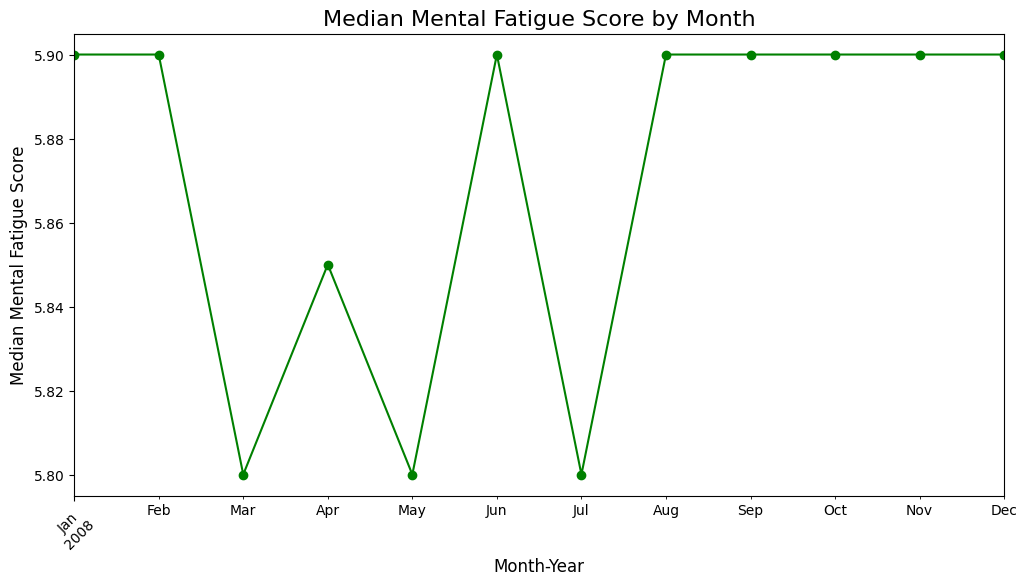

In [ ]:
#by median (to discount outliers)

monthly_median_fatigue = df1.groupby('Month-Year')['Mental Fatigue Score'].median()

ax = monthly_median_fatigue.plot(kind='line', figsize=(12, 6), marker='o', color='green')

# Add labels and title
ax.set_title('Median Mental Fatigue Score by Month', fontsize=16)
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Median Mental Fatigue Score', fontsize=12)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

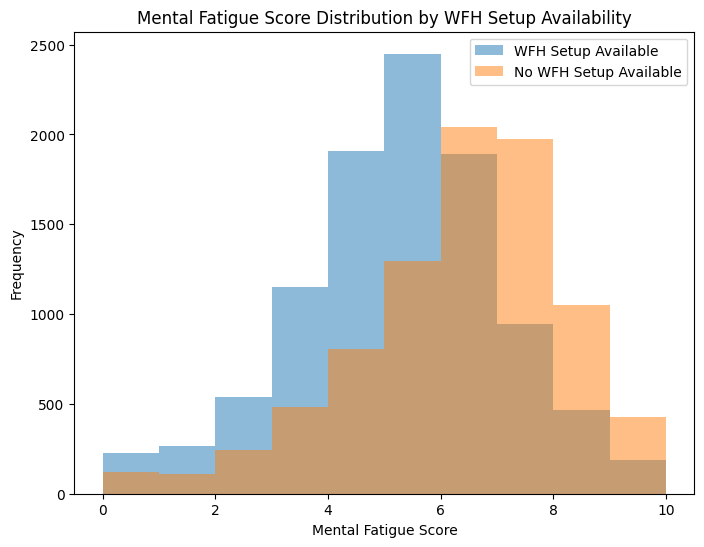

In [ ]:
# @title Mental Fatigue Score Distribution by WFH Setup Availability

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(df1[df1['WFH Setup Available'] == 'Yes']['Mental Fatigue Score'], alpha=0.5, label='WFH Setup Available')
plt.hist(df1[df1['WFH Setup Available'] == 'No']['Mental Fatigue Score'], alpha=0.5, label='No WFH Setup Available')

# Add labels and title
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Frequency')
plt.title('Mental Fatigue Score Distribution by WFH Setup Availability')
_ = plt.legend()

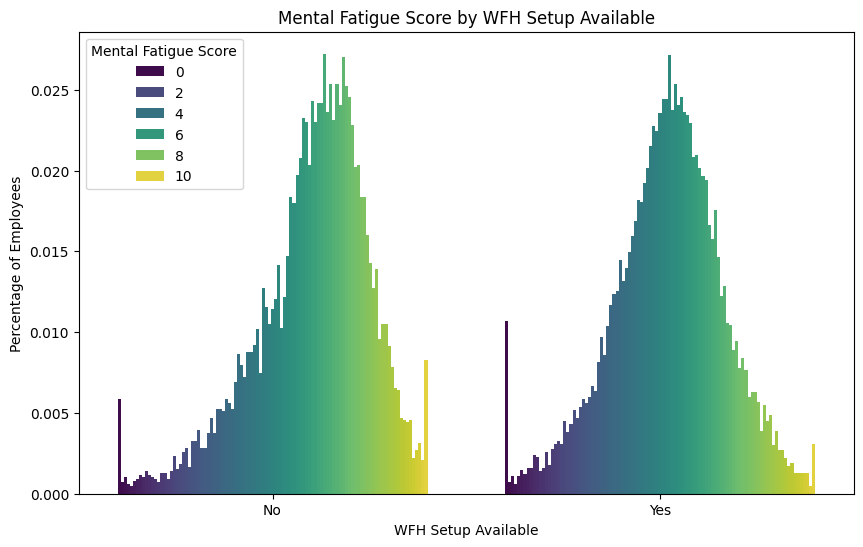

In [ ]:
mental_health_avg = df1.groupby('WFH Setup Available')['Mental Fatigue Score'].value_counts(normalize=True).reset_index(name='Percentage')

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=mental_health_avg, x='WFH Setup Available', y='Percentage', hue='Mental Fatigue Score', palette='viridis')
plt.title('Mental Fatigue Score by WFH Setup Available')
plt.xlabel('WFH Setup Available')
plt.ylabel('Percentage of Employees')
plt.legend(title='Mental Fatigue Score')
plt.show()

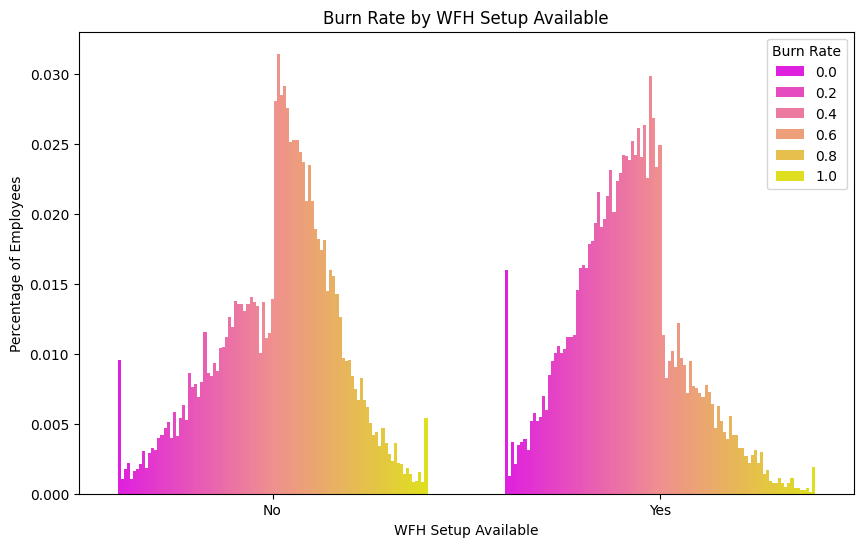

In [ ]:
mental_health_avg = df1.groupby('WFH Setup Available')['Burn Rate'].value_counts(normalize=True).reset_index(name='Percentage')

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=mental_health_avg, x='WFH Setup Available', y='Percentage', hue='Burn Rate', palette='spring')
plt.title('Burn Rate by WFH Setup Available')
plt.xlabel('WFH Setup Available')
plt.ylabel('Percentage of Employees')
plt.legend(title='Burn Rate')
plt.show()

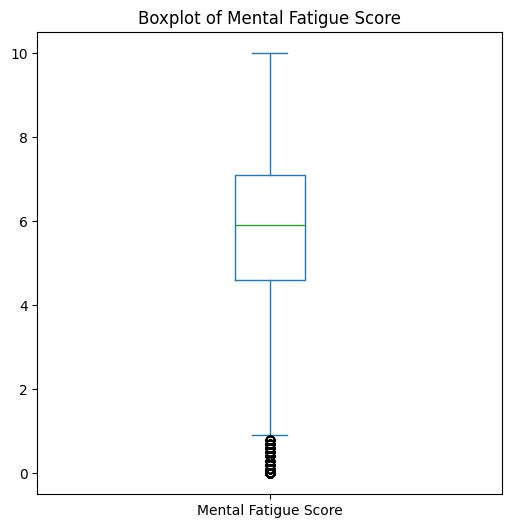

In [ ]:
#check outliers with boxplot

df1['Mental Fatigue Score'].plot(kind='box', figsize=(6, 6))
plt.title('Boxplot of Mental Fatigue Score')
plt.show()

In [ ]:
#calculate level of skewness

skewness = df1['Mental Fatigue Score'].skew()
print(f"Skewness: {skewness}")

Skewness: -0.4378549828367371


If skewness < 0: The data is negatively skewed (tail on the left). The median is more robust.

# Investigating outliers

In [ ]:
#calculate IQR

Q1 = df1['Mental Fatigue Score'].quantile(0.25)
Q3 = df1['Mental Fatigue Score'].quantile(0.75)
IQR = Q3 - Q1

IQR

2.5

In [ ]:
#define outlier boundaries

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

0.8499999999999996
10.85


In [ ]:
#identify outliers

outliers = df1[(df1['Mental Fatigue Score'] < lower_bound) |
               (df1['Mental Fatigue Score'] > upper_bound)]

outliers

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Designation Level,Month-Year
Employee ID,,,,,,,,,,
fffe31003600360039003900,2008-09-27,Male,Product,Yes,0.0,1.0,0.8,0.05,Low,2008-09
fffe33003200330030003500,2008-03-13,Male,Product,No,1.0,1.0,0.0,0.00,Low,2008-03
fffe31003100370037003500,2008-10-06,Male,Product,Yes,0.0,1.0,0.0,0.00,Low,2008-10
fffe31003400340032003700,2008-08-09,Male,Service,Yes,0.0,1.0,0.0,0.00,Low,2008-08
fffe32003800370033003900,2008-04-16,Female,Service,No,0.0,1.0,0.5,0.00,Low,2008-04
...,...,...,...,...,...,...,...,...,...,...
fffe32003300360037003500,2008-06-22,Male,Service,Yes,0.0,1.0,0.6,0.04,Low,2008-06
fffe31003700310038003300,2008-06-12,Male,Service,Yes,0.0,1.0,0.8,0.00,Low,2008-06
fffe32003600300030003400,2008-04-12,Male,Service,Yes,0.0,1.0,0.0,0.00,Low,2008-04


In [ ]:
#counting the outliers

num_outliers = len(outliers)
print(f"Number of outliers: {num_outliers}")

percentage_outliers = (num_outliers / len(df1)) * 100
print(f"Percentage of outliers: {percentage_outliers:.2f}%")

Number of outliers: 309
Percentage of outliers: 1.66%


In [ ]:
#filter out outliers

df1_no_outliers = df1[(df1['Mental Fatigue Score'] >= lower_bound) &
                      (df1['Mental Fatigue Score'] <= upper_bound)]

df1_no_outliers

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Designation Level,Month-Year
Employee ID,,,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,Mid,2008-09
fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,Low,2008-11
fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,Low,2008-11
fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,Mid,2008-07
fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29,Mid,2008-11
...,...,...,...,...,...,...,...,...,...,...
fffe3300390030003600,2008-12-15,Female,Product,Yes,1.0,3.0,6.0,0.48,Low,2008-12
fffe32003500370033003200,2008-05-27,Male,Product,No,3.0,7.0,6.2,0.54,Mid,2008-05
fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59,Mid,2008-01


In [ ]:
#confirm anticipated change
print(f"Original dataset size: {len(df1)}")
print(f"Dataset size after removing outliers: {len(df1_no_outliers)}")

Original dataset size: 18584
Dataset size after removing outliers: 18275


In [ ]:
#replacing the original dataset

df1 = df1_no_outliers
print(f"Original dataset size: {len(df1)}")

Original dataset size: 18275


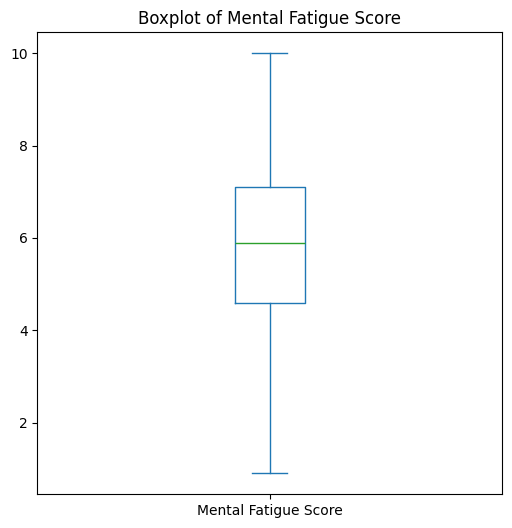

In [ ]:
#check outliers with boxplot

df1['Mental Fatigue Score'].plot(kind='box', figsize=(6, 6))
plt.title('Boxplot of Mental Fatigue Score')
plt.show()

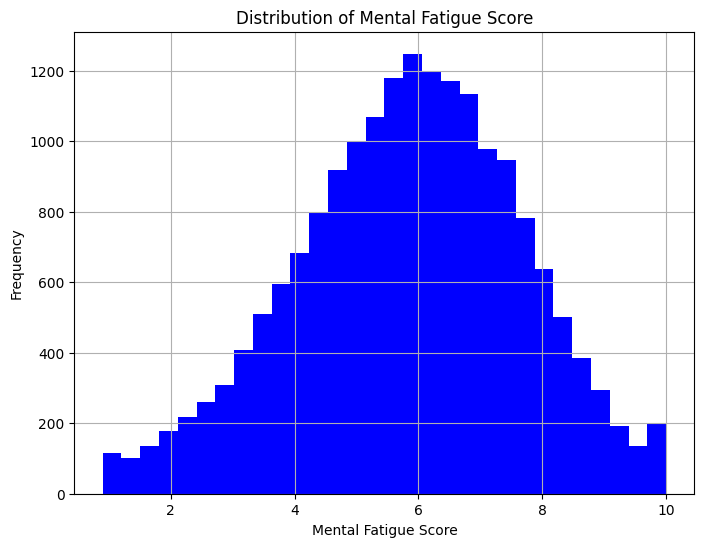

In [ ]:
#check distribution

df1['Mental Fatigue Score'].hist(bins=30, figsize=(8, 6), color='blue')
plt.title('Distribution of Mental Fatigue Score')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-132-b6d53f4dd598>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month-Year'] = df1['Date of Joining'].dt.to_period('M')


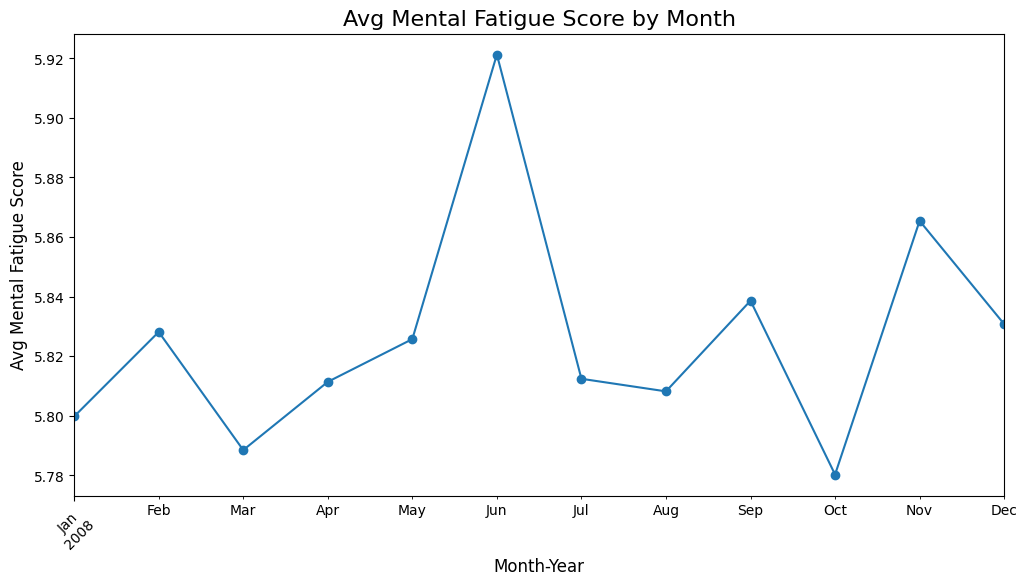

In [ ]:
# to get an overview of the avg mental fatigue score for each month based on joined date

df1['Month-Year'] = df1['Date of Joining'].dt.to_period('M')
monthly_mean_fatigue = df1.groupby('Month-Year')['Mental Fatigue Score'].mean()

ax = monthly_mean_fatigue.plot(kind='line', figsize=(12, 6), marker='o')

# Add labels and title
ax.set_title('Avg Mental Fatigue Score by Month', fontsize=16)
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Avg Mental Fatigue Score', fontsize=12)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Normalization & Heatmap

In [ ]:
# Select only numerical features for correlation analysis
numerical_features = df1.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
print(correlation_matrix)

                      Designation  Resource Allocation  Mental Fatigue Score  \
Designation              1.000000             0.873216              0.678265   
Resource Allocation      0.873216             1.000000              0.794590   
Mental Fatigue Score     0.678265             0.794590              1.000000   
Burn Rate                0.723627             0.848646              0.941589   

                      Burn Rate  
Designation            0.723627  
Resource Allocation    0.848646  
Mental Fatigue Score   0.941589  
Burn Rate              1.000000  


In [ ]:
numerical_features.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.873216,0.678265,0.723627
Resource Allocation,0.873216,1.000000,0.794590,0.848646
Mental Fatigue Score,0.678265,0.794590,1.000000,0.941589
Burn Rate,0.723627,0.848646,0.941589,1.000000


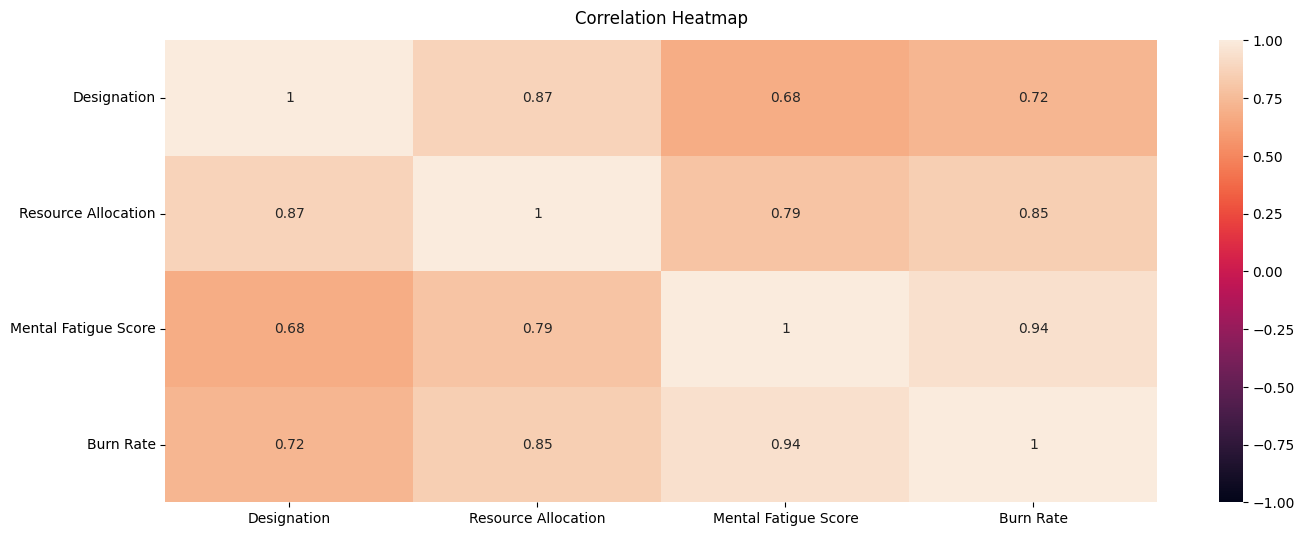

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numerical_features.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig("correlation_heatmap.png")

In [ ]:
def categorize_designation(data):
    if data["Designation"] <= 1.0:
        return 0
    if data["Designation"] > 1.0 and data["Designation"] <= 2.0:
        return 1
    if data["Designation"] > 2.0 and data["Designation"] <= 5.0:
        return 2
    return -1


def categorize_resource(data):
    if data["Resource Allocation"] <= 3.0:
        return 0
    if data["Resource Allocation"] > 3.0 and data["Resource Allocation"] <= 5.0:
        return 1
    if data["Resource Allocation"] > 5.0 and data["Resource Allocation"] <= 10.0:
        return 2
    return -1


def categorize_Mental_Fatigue(data):
    if data["Mental Fatigue Score"] <= 4.0:
        return 0
    if data["Mental Fatigue Score"] > 4.0 and data["Mental Fatigue Score"] <= 5.0:
        return 1
    if data["Mental Fatigue Score"] > 5.0 and data["Mental Fatigue Score"] <= 6.0:
        return 2
    if data["Mental Fatigue Score"] > 6.0 and data["Mental Fatigue Score"] <= 7.0:
        return 3
    if data["Mental Fatigue Score"] > 7.0:
        return 4
    return -1



df1["categorize_designation"] = df1.apply(categorize_designation, axis=1)
df1["categorize_resource"] = df1.apply(categorize_resource, axis=1)
df1["categorize_Mental_Fatigue"] = df1.apply(categorize_Mental_Fatigue, axis=1)

df2["categorize_designation"] = df2.apply(categorize_designation, axis=1)
df2["categorize_resource"] = df2.apply(categorize_resource, axis=1)
df2["categorize_Mental_Fatigue"] = df2.apply(categorize_Mental_Fatigue, axis=1)

<ipython-input-133-4dfefb4b7019>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["categorize_designation"] = df1.apply(categorize_designation, axis=1)
<ipython-input-133-4dfefb4b7019>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["categorize_resource"] = df1.apply(categorize_resource, axis=1)


In [ ]:
print("Cetegorized valued features values:----------", end="\n\n")

print(df1["categorize_designation"].value_counts(), end="\n\n")
print(df1["categorize_resource"].value_counts(), end="\n\n")
print(df1["categorize_Mental_Fatigue"].value_counts(), end="\n\n")

Cetegorized valued features values:----------

categorize_designation
2    7181
1    6214
0    4880
Name: count, dtype: int64

categorize_resource
1    6760
0    5794
2    5721
Name: count, dtype: int64

categorize_Mental_Fatigue
4    4731
2    3842
3    3824
0    3048
1    2830
Name: count, dtype: int64



In [ ]:
current_date = pd.to_datetime('today')

df1["Date of Joining"] = pd.to_datetime(train_df["Date of Joining"])
df2["Date of Joining"] = pd.to_datetime(test_df["Date of Joining"])

In [ ]:
def create_days_count(data):
    return (current_date - data["Date of Joining"])

df1["days_count"] = df1.apply(create_days_count, axis=1)
df1["days_count"] = df1["days_count"].dt.days

df2["days_count"] = df2.apply(create_days_count, axis=1)
df2["days_count"] = df2["days_count"].dt.days

In [ ]:
print(df1["Gender"].value_counts(), end="\n\n")
print(df1["Company Type"].value_counts(), end="\n\n")
print(df1["WFH Setup Available"].value_counts(), end="\n\n")

Gender
Female    9553
Male      8722
Name: count, dtype: int64

Company Type
Service    11977
Product     6298
Name: count, dtype: int64

WFH Setup Available
Yes    9827
No     8448
Name: count, dtype: int64



In [ ]:
one = 1
zero = 0

def gender_encoder(data):
    if data["Gender"] == "Female":
        return one
    return zero


def wfh_setup_encoder(data):
    if data["WFH Setup Available"] == "Yes":
        return one
    return zero


def company_encoder(data):
    if data["Company Type"] == "Service":
        return one
    return zero



df1["Gender"] = df1.apply(gender_encoder, axis=1)
df1["WFH Setup Available"] = df1.apply(wfh_setup_encoder, axis=1)
df1["Company Type"] = df1.apply(company_encoder, axis=1)

df2["Gender"] = df2.apply(gender_encoder, axis=1)
df2["WFH Setup Available"] = df2.apply(wfh_setup_encoder, axis=1)
df2["Company Type"] = df2.apply(company_encoder, axis=1)

In [ ]:
norm_cols = ["Designation", "Resource Allocation", "Mental Fatigue Score"]
#+ ["days_count", "categorize_designation", "categorize_resource", "categorize_Mental_Fatigue"]

train_df1_min = df1[norm_cols].min()
train_df1_max = df1[norm_cols].max()

df1[norm_cols] = (df1[norm_cols] - train_df1_min)/(train_df1_max - train_df1_min)

df2[norm_cols] = (df2[norm_cols] - train_df1_min)/(train_df1_max - train_df1_min)

In [ ]:
df1.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Designation Level,Month-Year,categorize_designation,categorize_resource,categorize_Mental_Fatigue,days_count
Employee ID,,,,,,,,,,,,,,
fffe32003000360033003200,2008-09-30,1,1,0,2.0,3.0,3.8,0.16,Mid,2008-09,1,0,0,5922
fffe3700360033003500,2008-11-30,0,1,1,1.0,2.0,5.0,0.36,Low,2008-11,0,0,1,5861
fffe32003400380032003900,2008-11-03,0,1,1,1.0,1.0,2.6,0.20,Low,2008-11,0,0,0,5888
fffe31003900340031003600,2008-07-24,1,1,0,3.0,7.0,6.9,0.52,Mid,2008-07,2,2,3,5990
fffe3300350037003500,2008-11-26,0,0,1,2.0,4.0,3.6,0.29,Mid,2008-11,1,1,0,5865


In [ ]:
# Since 'Employee ID' is the index, reset it to a column first
df1.reset_index(inplace=True)
# Now you can drop the columns
df1.drop(['Date of Joining', "Employee ID"], axis=1, inplace=True)

# Similarly for df2 (test_df copy) if 'Employee ID' was also set as index
df2.reset_index(inplace=True)
clean_df_test = df2.drop(['Date of Joining', "Employee ID"], axis=1)

In [ ]:
# Select only numerical features for correlation analysis
numerical_features = df1.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
print(correlation_matrix)

                             Gender  Company Type  WFH Setup Available  \
Gender                     1.000000      0.009034             0.074285   
Company Type               0.009034      1.000000            -0.000088   
WFH Setup Available        0.074285     -0.000088             1.000000   
Designation               -0.108621      0.007080            -0.233253   
Resource Allocation       -0.140389      0.004063            -0.288026   
Mental Fatigue Score      -0.148997      0.001413            -0.289638   
Burn Rate                 -0.157673      0.003577            -0.314644   
categorize_designation    -0.100304      0.003871            -0.220622   
categorize_resource       -0.140615      0.002733            -0.288526   
categorize_Mental_Fatigue -0.154484      0.003050            -0.299175   
days_count                 0.002152      0.000109             0.001220   

                           Designation  Resource Allocation  \
Gender                       -0.108621          

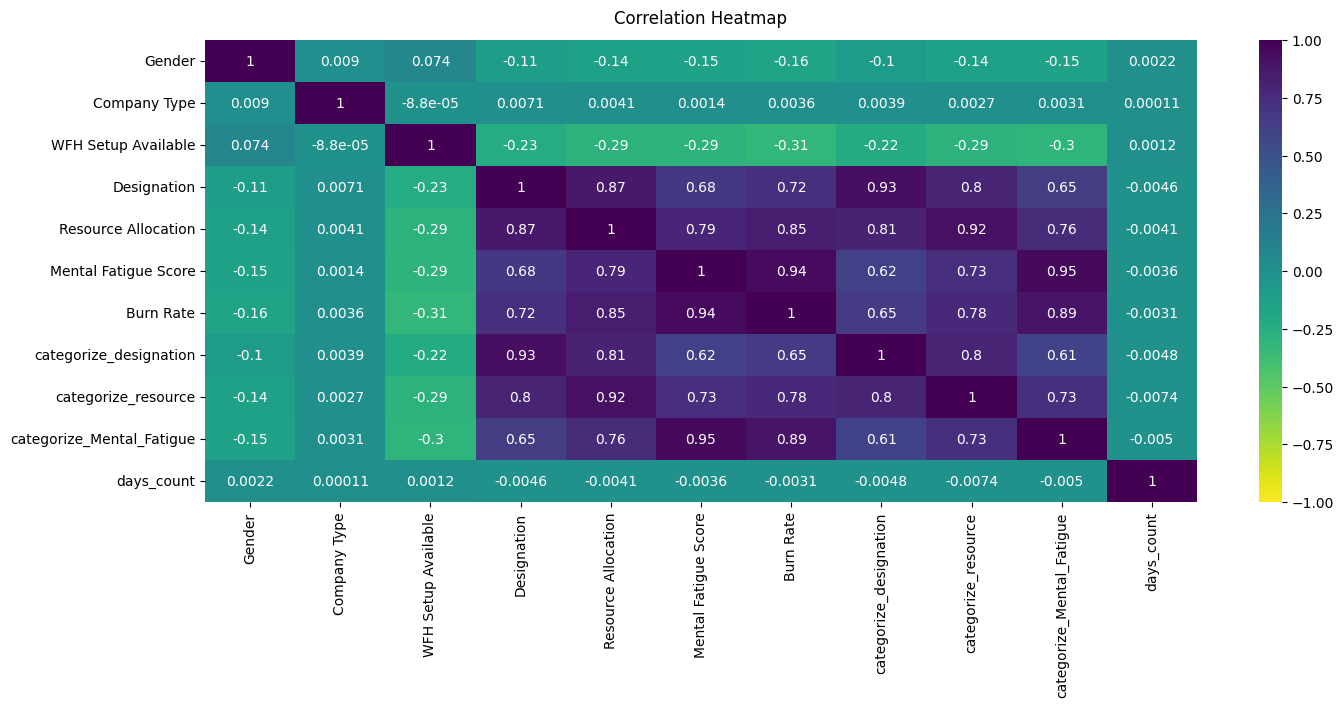

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numerical_features.corr(), vmin=-1, vmax=1, annot=True, cmap='viridis_r')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig("correlation_heatmap.png")

In [ ]:
clean_df = df1.copy()

df1.to_csv("clean_df_train.csv", index=False)
train_file_path = "./clean_df_train.csv"
new_df = pd.read_csv(train_file_path)

clean_df_test.to_csv("clean_df_test.csv", index=False)
test_file_path = "./clean_df_test.csv"
new_df_test = pd.read_csv(test_file_path)

new_df_test.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,categorize_designation,categorize_resource,categorize_Mental_Fatigue,days_count
0,1,1,0,2.0,5.0,7.7,1,1,4,5851
1,1,0,1,1.0,2.0,5.2,0,0,2,5969
2,0,0,1,1.0,3.0,5.9,0,0,2,5878
3,1,1,0,3.0,6.0,4.6,2,2,1,6158
4,1,0,0,2.0,5.0,6.4,1,1,3,5997


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV

import xgboost


from sklearn.metrics import r2_score

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_df.loc[:, clean_df.columns != "Burn Rate"],
                                                    clean_df.loc[:, clean_df.columns == "Burn Rate"],
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
def print_r2_score(y_train, train_pred, y_test, test_pred):
    r2_train = r2_score(y_train, train_pred)
    print("Score LR Train: "+str(round(100*r2_train, 4))+" %")

    r2_test = r2_score(y_test, test_pred)
    print("Score LR Test: "+str(round(100*r2_test, 4))+" %")

In [ ]:
sub = pd.read_csv(test_url)
sub = sub.loc[:, ["Employee ID"]]

In [ ]:

numerical_features = df1.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('Burn Rate') # Remove the target variable
X = df1[numerical_features]  # Features (numerical columns)
y = df1['Burn Rate']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared for training set
r2_train = r2_score(y_train, y_train_pred)
print(f"R-squared accuracy (Training): {r2_train}")

# Calculate R-squared for testing set
r2_test = r2_score(y_test, y_test_pred)
print(f"R-squared accuracy (Testing): {r2_test}")

R-squared accuracy (Training): 0.9159239567224696
R-squared accuracy (Testing): 0.9144313641226136


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

numerical_features = df1.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('Burn Rate')
X = df1[numerical_features]
y = df1['Burn Rate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

# Predictions on training and testing sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate R-squared for training set
r2_train = r2_score(y_train, y_train_pred)
print(f"R-squared accuracy (Training): {r2_train}")

# Calculate R-squared for testing set
r2_test = r2_score(y_test, y_test_pred)
print(f"R-squared accuracy (Testing): {r2_test}")

R-squared accuracy (Training): 0.9872103391388051
R-squared accuracy (Testing): 0.9094246227149589


Reasoning:

Import necessary libraries: RandomForestRegressor, r2_score, train_test_split are imported for model creation, evaluation, and data splitting.

Data preparation: This part remains the same as in your Linear Regression code – selecting numerical features, defining target variable, and splitting data
.
Model creation and training: A RandomForestRegressor object is created (you can customize hyperparameters like n_estimators, max_depth, etc.). The model is then trained using fit on the training data.

Prediction and evaluation: Predictions are made on both training and testing sets using predict. The R-squared score is calculated using r2_score to evaluate the model's performance.

By replacing the Linear Regression model with Random Forest, you can leverage the power of ensemble learning for potentially better predictive accuracy. Remember to experiment with different hyperparameter settings to further optimize your model.

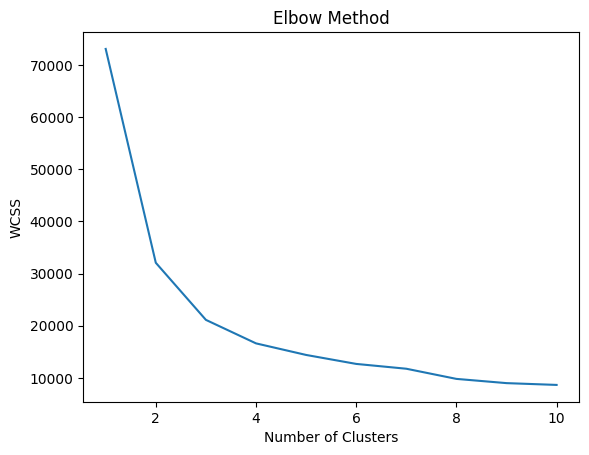

         Mental Fatigue Score  Resource Allocation  Designation  Burn Rate
cluster                                                                   
0                    5.940358             4.473914     2.179276   0.460743
1                    3.718731             2.259435     1.044853   0.239253
2                    7.785201             6.992328     3.451242   0.684161


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select relevant features for clustering, including 'Burn Rate'
features_for_clustering = ['Mental Fatigue Score', 'Resource Allocation', 'Designation', 'Burn Rate']
X = clean_df[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()  # This will display the graph to help you choose the optimal number of clusters

# Based on the Elbow method, choose the optimal number of clusters (e.g., 3)
optimal_num_clusters = 3  # You might need to adjust this based on the Elbow method graph

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
clean_df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters (e.g., by examining the characteristics of data points in each cluster)
print(clean_df.groupby('cluster')[['Mental Fatigue Score', 'Resource Allocation', 'Designation', 'Burn Rate']].mean())
# You can further visualize the clusters using scatter plots or other techniques if needed.

In [ ]:
# Analyze the clusters
cluster_means = clean_df.groupby('cluster')[['Mental Fatigue Score', 'Resource Allocation', 'Designation', 'Burn Rate']].mean()

print(cluster_means)

         Mental Fatigue Score  Resource Allocation  Designation  Burn Rate
cluster                                                                   
0                    5.940358             4.473914     2.179276   0.460743
1                    3.718731             2.259435     1.044853   0.239253
2                    7.785201             6.992328     3.451242   0.684161


To determine if the clustering is good, consider the following:

Separation between clusters: Examine the cluster_means output. If the means of the features (especially 'Burn Rate') are significantly different across clusters, it suggests good separation and potentially meaningful clusters.

Cluster size: Check the distribution of data points across clusters. Ideally, clusters should have a reasonable number of data points and not be too imbalanced.

In [ ]:
from sklearn.metrics import silhouette_score

# Select relevant features for clustering
features_for_clustering = ['Mental Fatigue Score', 'Resource Allocation', 'Designation', 'Burn Rate']
X = clean_df[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, clean_df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3726796440837502


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Select relevant features for clustering.
features_for_clustering = ['Mental Fatigue Score', 'Resource Allocation', 'Designation', 'Burn Rate']
X = clean_df[features_for_clustering]

# Scale the features using StandardScaler.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering.
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
predicted_labels = kmeans.fit_predict(X_scaled)

# Instead of using 'true_labels' which doesn't exist, we will
# assume 'cluster' column from previous KMeans run as the true labels for demonstration.
# Replace 'cluster' with the actual ground truth labels column name if you have one.
true_labels = clean_df['cluster']

# Calculate Adjusted Rand Index (ARI).
ari = adjusted_rand_score(true_labels, predicted_labels)

# Calculate Silhouette Score.
silhouette_avg = silhouette_score(X_scaled, predicted_labels)

# Print Results:
print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Silhouette Score: {silhouette_avg}")

Adjusted Rand Index (ARI): 1.0
Silhouette Score: 0.3726796440837502


Adjusted Rand Index (ARI): 1.0

An ARI of 1.0 indicates perfect agreement between the predicted cluster assignments and the ground truth labels. This means your clustering algorithm has perfectly recovered the underlying structure of the data based on the ground truth (which, in this case, is assumed to be the 'cluster' column created in a previous KMeans run).
Silhouette Score: 0.3726796440837502

The Silhouette Score ranges from -1 to +1.
A score closer to +1 suggests that the data points are well clustered and assigned to the appropriate clusters.
A score closer to 0 indicates that the clusters are overlapping or poorly separated.
A score closer to -1 suggests that data points may have been assigned to the wrong clusters.
Interpretation of Combined Results

High ARI (1.0) and Moderate Silhouette Score (0.37): This combination suggests that your clustering algorithm has perfectly matched the ground truth labeling, but the clusters themselves might have some degree of overlap or aren't as clearly separated as they could be.
In simpler terms:

Your algorithm is doing a great job of assigning data points to the same clusters as the ground truth.
However, the clusters themselves might not be as distinct or well-defined as you might ideally want. There could be some fuzziness at the boundaries between clusters.
Possible Reasons for Moderate Silhouette Score with Perfect ARI

Ground truth limitations: The ground truth labels (assumed to be the 'cluster' column from a previous KMeans run) might not perfectly represent the underlying structure of the data.
Data characteristics: The data itself might have some inherent overlap or ambiguity, making it difficult to achieve perfectly separated clusters, even with a correct clustering algorithm.
Cluster shape: KMeans assumes that clusters are spherical and equally sized. If the actual clusters in your data have different shapes or densities, KMeans might not be able to capture them perfectly, leading to a lower Silhouette Score.
Further Investigation

Visualize clusters: Try visualizing your clusters using scatter plots or other visualization techniques to see if you can observe any overlap or areas of ambiguity.
Explore other clustering algorithms: If you're concerned about the Silhouette Score, you could try experimenting with other clustering algorithms (e.g., DBSCAN, hierarchical clustering) that might be better suited to the shape of your data.
Reassess features: Consider whether the features you're using for clustering are the most relevant ones for capturing the underlying structure of the data. You might try adding or removing features to see if it improves the Silhouette Score.